In [1]:
import numpy as np
import random
import math
import pandas as pd
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


n_usuarios=100
n_usuarios_extra=50
n_usuarios_final=n_usuarios+n_usuarios_extra

In [2]:
#Perro
List = ['No','Si']  
sNumbers1 = np.random.choice(List, n_usuarios, p=[0.57,0.43])
#No fumador
List = ['No','Si']
sNumbers2 = np.random.choice(List, n_usuarios, p=[0.6,0.4])
#Mejor en persona
List = ['No','Si']
sNumbers3 = np.random.choice(List, n_usuarios, p=[0.77,0.23])
#Gym ocasional
List = ['No','Si']
sNumbers4 = np.random.choice(List, n_usuarios, p=[0.84,0.16])
#Viajar
List = ['No','Si']
sNumbers5 = np.random.choice(List, n_usuarios, p=[0.7,0.3])
#Socialmente activo
List = ['No','Si']
sNumbers6 = np.random.choice(List, n_usuarios, p=[0.8,0.2])
#Selfies
List = [1,2,3,4,5]  
sNumbers7 = np.random.choice(List, n_usuarios, p=[0.1,0.3,0.35,0.2,0.05])
#Fotos casuales
List = [0,1,2,3]  
sNumbers8 = np.random.choice(List, n_usuarios, p=[0.1,0.6,0.2,0.1])
#Fotos playa
List = [0,1]  
sNumbers9 = np.random.choice(List, n_usuarios, p=[0.88,0.12])
#Fotos lugares turísticos
List = [0,1,2,3]  
sNumbers10 = np.random.choice(List, n_usuarios, p=[0.85,0.05,0.05,0.05])
#Fotos gym
List = [0,1,2]  
sNumbers11 = np.random.choice(List, n_usuarios, p=[0.90,0.05,0.05])
#Fotos mascota
List = [0,1]  
sNumbers12 = np.random.choice(List, n_usuarios, p=[0.85,0.15])
#Instagram anexado
List = ['No','Si']
sNumbers13 = np.random.choice(List, n_usuarios, p=[0.76,0.24])
#Spotify anexado
List = ['No','Si']
sNumbers14 = np.random.choice(List, n_usuarios, p=[0.6,0.4])
#Adjunta Universidad
List = ['No','Si']
sNumbers15 = np.random.choice(List, n_usuarios, p=[0.74,0.26])
#Adjunta empleo
List = ['No','Si']
sNumbers16 = np.random.choice(List, n_usuarios, p=[0.8,0.2])
#Perfil verificado
List = ['No','Si']
sNumbers17 = np.random.choice(List, n_usuarios, p=[0.46,0.54])
#Adjunta comentario personal
List = ['No','Si']
sNumbers18 = np.random.choice(List, n_usuarios, p=[0.48,0.52])
sNumbers19=[]
for i in range(n_usuarios):
 sNumbers19.append(random.randint(18, 35))
sNumbers20=[]
sNumbers21=[]
for i in range(n_usuarios):
 sNumbers20.append(random.uniform(0, 15))
 sNumbers21.append(random.uniform(0, 15))

In [3]:
name_dict={
    'Perro': sNumbers1,
    'No fumador': sNumbers2,
    'Mejor en persona':sNumbers3,
    'Aire libre':sNumbers4,
    'Gimnasio ocasional' :sNumbers5,
    'Viajar':sNumbers6,
    'Nº de fotos selfie':sNumbers7,
    'Nº de fotos casuales':sNumbers8,
    'Nº de fotos en playa':sNumbers9,
    'Nº de fotos en lugares turísticos':sNumbers10,
    'Nº de fotos en gimnasio':sNumbers11,
    'Nº de fotos con mascota':sNumbers12,
    'Instagram anexado':sNumbers13,
    'Spotify anexado':sNumbers14,
    'Adjunta Universidad':sNumbers15,
    'Adjunta empleo':sNumbers16,
    'Perfil verificado':sNumbers17,
    'Adjunta comentario personal':sNumbers18,
    'Edad':sNumbers19,
    'Coordenadas X':sNumbers20,
    'Coordenadas Y':sNumbers21,
}

In [4]:
import pandas as pd
df = pd.DataFrame(name_dict)
print(df)
df.to_csv('C:/Users/User/OneDrive/Escritorio/nuevo.csv',index=False)
caracteristicas_df = pd.read_csv('C:/Users/User/OneDrive/Escritorio/nuevo.csv',encoding='latin1')
caracteristicas_df.head()

   Perro No fumador Mejor en persona Aire libre Gimnasio ocasional Viajar  \
0     Si         Si               Si         No                 Si     Si   
1     No         No               Si         No                 Si     No   
2     Si         No               No         No                 No     No   
3     No         No               No         No                 No     Si   
4     No         No               No         No                 No     No   
..   ...        ...              ...        ...                ...    ...   
95    No         Si               No         Si                 No     Si   
96    No         No               No         No                 Si     Si   
97    No         Si               No         Si                 No     No   
98    No         Si               No         No                 No     No   
99    No         No               No         No                 No     No   

    Nº de fotos selfie  Nº de fotos casuales  Nº de fotos en playa  \
0    

Perro No fumador Mejor en persona Aire libre Gimnasio ocasional Viajar  \
0    Si         Si               Si         No                 Si     Si   
1    No         No               Si         No                 Si     No   
2    Si         No               No         No                 No     No   
3    No         No               No         No                 No     Si   
4    No         No               No         No                 No     No   

   NÂº de fotos selfie  NÂº de fotos casuales  NÂº de fotos en playa  \
0                    2                      1                      1   
1                    1                      3                      0   
2                    3                      0                      0   
3                    2                      1                      0   
4                    3                      2                      0   

   NÂº de fotos en lugares turÃ­sticos  ...  NÂº de fotos con mascota  \
0                                    0  ...                         0   
1                                    0  ...                         0   
2                                    0  ...                         0   
3                                    0  ...                         0   
4                                    0  ...                         0   

   Instagram anexado Spotify anexado Adjunta Universidad Adjunta empleo  \
0                 No              Si                  No             No   
1                 No              No                  No             No   
2                 No              No                  No             No   
3                 No              Si                  No             No   
4                 No              Si                  No             No   

  Perfil verificado Adjunta comentario personal Edad  Coordenadas X  \
0                Si                          Si   32      13.495382   
1                Si                          No   21       6.236577   
2                Si                          No   30      10.531734   
3                Si                          No   18       3.050668   
4                No                          Si   26      11.848461   

   Coordenadas Y  
0       0.309745  
1       4.630179  
2      11.462745  
3       8.531871  
4       0.483333  

[5 rows x 21 columns]

In [5]:
x=caracteristicas_df['Coordenadas X'].values.tolist()
y=caracteristicas_df['Coordenadas Y'].values.tolist()
Latitud=[]
Longitud=[]
for i in range(0,n_usuarios):
 Latitud.append(40.3122574+y[i]/111.7)
 Longitud.append(-3.650054-x[i]/85)
caracteristicas_df.loc[:,'Latitud'] = Latitud
caracteristicas_df.loc[:,'Longitud'] = Longitud
caracteristicas_df.to_csv('C:/Users/User/OneDrive/Escritorio/viejo.csv',index=False)

In [6]:
id_min=0
id_max=n_usuarios
row_min=0
row_max=6
gustos_comunes=np.zeros([n_usuarios_final,n_usuarios_final,6])
gustos=np.zeros([n_usuarios_final,6])
for id1 in range(id_min,id_max):
 for row in range(row_min,row_max):
    if caracteristicas_df.iloc[id1,row]=='Si':
        gustos[id1,row]=1
    else:
        gustos[id1,row]=0
    for id2 in range(id_min,id_max):
    
        if caracteristicas_df.iloc[id1,row]==caracteristicas_df.iloc[id2,row] and caracteristicas_df.iloc[id1,row]=='Si':

            gustos_comunes[id1,id2,row]=1
        else:
        
            gustos_comunes[id1,id2,row]=0
id_min=0
id_max=n_usuarios
row_min=0
row_max=6

n_fotos_actividades_comunes=np.zeros([n_usuarios_final,n_usuarios_final,6])
n_fotos_actividades=np.zeros([n_usuarios_final,6])
for id1 in range(id_min,id_max):
 for row in range(row_min,row_max):
  n_fotos_actividades[id1,row]=caracteristicas_df.iloc[id1,row+6]
  for id2 in range(id_min,id_max):
            n_fotos_actividades_comunes[id1,id2,row]=min(caracteristicas_df.iloc[id1,row+6],caracteristicas_df.iloc[id2,row+6])
print(caracteristicas_df.iloc[0,6])
print(caracteristicas_df.iloc[1,6])
id_min=0
id_max=n_usuarios
row_min=0
row_max=6
carac_comunes=np.zeros([n_usuarios_final,n_usuarios_final,6])
carac=np.zeros([n_usuarios_final,6])
for id1 in range(id_min,id_max):
 for row in range(row_min,row_max):
    if caracteristicas_df.iloc[id1,row+12]=='Si':
        carac[id1,row]=1
    else:
        carac[id1,row]=0
    for id2 in range(id_min,id_max):
    
        if caracteristicas_df.iloc[id1,row+12]==caracteristicas_df.iloc[id2,row+12] and caracteristicas_df.iloc[id1,row+12]=='Si':

            carac_comunes[id1,id2,row]=1
        else:
        
            carac_comunes[id1,id2,row]=0
id_min=0
id_max=n_usuarios
row=0
edad_relativa=np.zeros([n_usuarios_final,n_usuarios_final,1])
edad=np.zeros([n_usuarios_final,1])
for id1 in range(id_min,id_max):
 edad[id1,row]=caracteristicas_df.iloc[id1,row+18]
 for id2 in range(id_min,id_max):
  edad_relativa[id1,id2,row]=abs(caracteristicas_df.iloc[id1,row+18]-caracteristicas_df.iloc[id2,row+18])
id_min=0
id_max=n_usuarios
row=0
distancia_relativa=np.zeros([n_usuarios_final,n_usuarios_final,1])
for id1 in range(id_min,id_max):
  for id2 in range(id_min,id_max):
            distancia_relativa[id1,id2,row]=math.sqrt((caracteristicas_df.iloc[id1,row+19]-caracteristicas_df.iloc[id2,row+19])**2+(caracteristicas_df.iloc[id1,row+20]-caracteristicas_df.iloc[id2,row+20])**2)#Lista ID
id_min=0
id_max=n_usuarios
id_matriz=np.zeros([n_usuarios_final])
for id1 in range(id_min,id_max):
 id_matriz[id1]=id1


2
1


In [7]:
id_min=0
id_max=n_usuarios
lista_id_perfil=[]
lista_id_usuario=[]
lista_perro_propio=[]
lista_perro_comun=[]
lista_perro_destino=[]
lista_nofumador_propio=[]
lista_nofumador_comun=[]
lista_nofumador_destino=[]
lista_enpersona_propio=[]
lista_enpersona_comun=[]
lista_enpersona_destino=[]
lista_gimocasional_propio=[]
lista_gimocasional_comun=[]
lista_gimocasional_destino=[]
lista_viajar_propio=[]
lista_viajar_comun=[]
lista_viajar_destino=[]
lista_socialmenteactivo_propio=[]
lista_socialmenteactivo_comun=[]
lista_socialmenteactivo_destino=[]
n_fotos_selfie_cara_propio=[]
n_fotos_selfie_cara_comun=[]
n_fotos_selfie_cara_destino=[]
n_fotos_casuales_propio=[]
n_fotos_casuales_comun=[]
n_fotos_casuales_destino=[]
n_fotos_playa_propio=[]
n_fotos_playa_comun=[]
n_fotos_playa_destino=[]
n_fotos_lugares_turisticos_propio=[]
n_fotos_lugares_turisticos_comun=[]
n_fotos_lugares_turisticos_destino=[]
n_fotos_gimnasio_propio=[]
n_fotos_gimnasio_comun=[]
n_fotos_gimnasio_destino=[]
n_fotos_mascota_propio=[]
n_fotos_mascota_comun=[]
n_fotos_mascota_destino=[]
lista_instagram_propio=[]
lista_instagram_comun=[]
lista_instagram_destino=[]
lista_spotify_propio=[]
lista_spotify_comun=[]
lista_spotify_destino=[]
lista_universidad_propio=[]
lista_universidad_comun=[]
lista_universidad_destino=[]
lista_empleo_propio=[]
lista_empleo_comun=[]
lista_empleo_destino=[]
lista_verificacion_perfil_propio=[]
lista_verificacion_perfil_comun=[]
lista_verificacion_perfil_destino=[]
lista_comentario_personal_propio=[]
lista_comentario_personal_comun=[]
lista_comentario_personal_destino=[]
lista_edad_propio=[]
lista_edad_relativa=[]
lista_edad_destino=[]
lista_distancia_relativa=[]

for id1 in range(id_min,id_max):
 lista_id_aux=id_matriz[id_min:id_max].tolist()
 lista_id_perfil.extend(lista_id_aux)
 lista_id_usuario_aux=[id1]*n_usuarios
 lista_id_usuario.extend(lista_id_usuario_aux)

 #Lista de gustos/características  
 lista_perro_propio_aux=gustos[id1:id1+1,0].tolist()*n_usuarios
 lista_perro_propio.extend(lista_perro_propio_aux)
 lista_perro_comun_aux=gustos_comunes[id1,id_min:id_max,0].tolist()
 lista_perro_comun.extend(lista_perro_comun_aux)
 lista_perro_destino_aux=gustos[id_min:id_max,0].tolist()
 lista_perro_destino.extend(lista_perro_destino_aux)
    
 lista_nofumador_propio_aux=gustos[id1:id1+1,1].tolist()*n_usuarios
 lista_nofumador_propio.extend( lista_nofumador_propio_aux)
 lista_nofumador_comun_aux=gustos_comunes[id1,id_min:id_max,1].tolist()
 lista_nofumador_comun.extend(lista_nofumador_comun_aux)
 lista_nofumador_destino_aux=gustos[id_min:id_max,1].tolist()
 lista_nofumador_destino.extend(lista_nofumador_destino_aux)
    
 lista_enpersona_propio_aux=gustos[id1:id1+1,2].tolist()*n_usuarios
 lista_enpersona_propio.extend(lista_enpersona_propio_aux)
 lista_enpersona_comun_aux=gustos_comunes[id1,id_min:id_max,2].tolist()
 lista_enpersona_comun.extend(lista_enpersona_comun_aux)
 lista_enpersona_destino_aux=gustos[id_min:id_max,2].tolist()
 lista_enpersona_destino.extend(lista_enpersona_destino_aux)
    
 lista_gimocasional_propio_aux=gustos[id1:id1+1,3].tolist()*n_usuarios
 lista_gimocasional_propio.extend(lista_gimocasional_propio_aux)
 lista_gimocasional_comun_aux=gustos_comunes[id1,id_min:id_max,3].tolist()
 lista_gimocasional_comun.extend(lista_gimocasional_comun_aux)
 lista_gimocasional_destino_aux=gustos[id_min:id_max,3].tolist()
 lista_gimocasional_destino.extend(lista_gimocasional_destino_aux)
    
 lista_viajar_propio_aux=gustos[id1:id1+1,4].tolist()*n_usuarios
 lista_viajar_propio.extend(lista_viajar_propio_aux)
 lista_viajar_comun_aux=gustos_comunes[id1,id_min:id_max,4].tolist()
 lista_viajar_comun.extend(lista_viajar_comun_aux)
 lista_viajar_destino_aux=gustos[id_min:id_max,4].tolist() 
 lista_viajar_destino.extend(lista_viajar_destino_aux)
    
 lista_socialmenteactivo_propio_aux=gustos[id1:id1+1,5].tolist()*n_usuarios
 lista_socialmenteactivo_propio.extend(lista_socialmenteactivo_propio_aux)
 lista_socialmenteactivo_comun_aux=gustos_comunes[id1,id_min:id_max,5].tolist()
 lista_socialmenteactivo_comun.extend(lista_socialmenteactivo_comun_aux)
 lista_socialmenteactivo_destino_aux=gustos[id_min:id_max,5].tolist()
 lista_socialmenteactivo_destino.extend(lista_socialmenteactivo_destino_aux)
    
#Fotos de cada tipo
 n_fotos_selfie_cara_propio_aux=n_fotos_actividades[id1:id1+1,0].tolist()*n_usuarios
 n_fotos_selfie_cara_propio.extend(n_fotos_selfie_cara_propio_aux)
 n_fotos_selfie_cara_comun_aux=n_fotos_actividades_comunes[id1,id_min:id_max,0].tolist()
 n_fotos_selfie_cara_comun.extend(n_fotos_selfie_cara_comun_aux)
 n_fotos_selfie_cara_destino_aux=n_fotos_actividades[id_min:id_max,0].tolist()
 n_fotos_selfie_cara_destino.extend(n_fotos_selfie_cara_destino_aux)

 n_fotos_casuales_propio_aux=n_fotos_actividades[id1:id1+1,1].tolist()*n_usuarios
 n_fotos_casuales_propio.extend(n_fotos_casuales_propio_aux)
 n_fotos_casuales_comun_aux=n_fotos_actividades_comunes[id1,id_min:id_max,1].tolist()
 n_fotos_casuales_comun.extend(n_fotos_casuales_comun_aux)
 n_fotos_casuales_destino_aux=n_fotos_actividades[id_min:id_max,1].tolist()
 n_fotos_casuales_destino.extend(n_fotos_casuales_destino_aux)

 n_fotos_playa_propio_aux=n_fotos_actividades[id1:id1+1,2].tolist()*n_usuarios
 n_fotos_playa_propio.extend(n_fotos_playa_propio_aux)
 n_fotos_playa_comun_aux=n_fotos_actividades_comunes[id1,id_min:id_max,2].tolist()
 n_fotos_playa_comun.extend(n_fotos_playa_comun_aux)
 n_fotos_playa_destino_aux=n_fotos_actividades[id_min:id_max,2].tolist()
 n_fotos_playa_destino.extend(n_fotos_playa_destino_aux)

 n_fotos_lugares_turisticos_propio_aux=n_fotos_actividades[id1:id1+1,3].tolist()*n_usuarios
 n_fotos_lugares_turisticos_propio.extend(n_fotos_lugares_turisticos_propio_aux)
 n_fotos_lugares_turisticos_comun_aux=n_fotos_actividades_comunes[id1,id_min:id_max,3].tolist()
 n_fotos_lugares_turisticos_comun.extend(n_fotos_lugares_turisticos_comun_aux)
 n_fotos_lugares_turisticos_destino_aux=n_fotos_actividades[id_min:id_max,3].tolist()
 n_fotos_lugares_turisticos_destino.extend(n_fotos_lugares_turisticos_destino_aux)

 n_fotos_gimnasio_propio_aux=n_fotos_actividades[id1:id1+1,4].tolist()*n_usuarios
 n_fotos_gimnasio_propio.extend(n_fotos_gimnasio_propio_aux)
 n_fotos_gimnasio_comun_aux=n_fotos_actividades_comunes[id1,id_min:id_max,4].tolist()
 n_fotos_gimnasio_comun.extend(n_fotos_gimnasio_comun_aux)
 n_fotos_gimnasio_destino_aux=n_fotos_actividades[id_min:id_max,4].tolist()
 n_fotos_gimnasio_destino.extend(n_fotos_gimnasio_destino_aux)

 n_fotos_mascota_propio_aux=n_fotos_actividades[id1:id1+1,5].tolist()*n_usuarios
 n_fotos_mascota_propio.extend(n_fotos_mascota_propio_aux)
 n_fotos_mascota_comun_aux=n_fotos_actividades_comunes[id1,id_min:id_max,5].tolist()
 n_fotos_mascota_comun.extend(n_fotos_mascota_comun_aux)
 n_fotos_mascota_destino_aux=n_fotos_actividades[id_min:id_max,5].tolist()
 n_fotos_mascota_destino.extend(n_fotos_mascota_destino_aux)

#Características del perfil
 lista_instagram_propio_aux=carac[id1:id1+1,0].tolist()*n_usuarios
 lista_instagram_propio.extend(lista_instagram_propio_aux)
 lista_instagram_comun_aux=carac_comunes[id1,id_min:id_max,0].tolist()
 lista_instagram_comun.extend(lista_instagram_comun_aux)
 lista_instagram_destino_aux=carac[id_min:id_max,0].tolist()
 lista_instagram_destino.extend(lista_instagram_destino_aux)

 lista_spotify_propio_aux=carac[id1:id1+1,1].tolist()*n_usuarios
 lista_spotify_propio.extend(lista_spotify_propio_aux)
 lista_spotify_comun_aux=carac_comunes[id1,id_min:id_max,1].tolist()
 lista_spotify_comun.extend(lista_spotify_comun_aux)
 lista_spotify_destino_aux=carac[id_min:id_max,1].tolist()
 lista_spotify_destino.extend(lista_spotify_destino_aux)

 lista_universidad_propio_aux=carac[id1:id1+1,2].tolist()*n_usuarios
 lista_universidad_propio.extend(lista_universidad_propio_aux)
 lista_universidad_comun_aux=carac_comunes[id1,id_min:id_max,2].tolist()
 lista_universidad_comun.extend(lista_universidad_comun_aux)
 lista_universidad_destino_aux=carac[id_min:id_max,2].tolist()
 lista_universidad_destino.extend(lista_universidad_destino_aux)

 lista_empleo_propio_aux=carac[id1:id1+1,3].tolist()*n_usuarios
 lista_empleo_propio.extend(lista_empleo_propio_aux)
 lista_empleo_comun_aux=carac_comunes[id1,id_min:id_max,3].tolist()
 lista_empleo_comun.extend(lista_empleo_comun_aux)
 lista_empleo_destino_aux=carac[id_min:id_max,3].tolist()
 lista_empleo_destino.extend(lista_empleo_destino_aux)

 lista_verificacion_perfil_propio_aux=carac[id1:id1+1,4].tolist()*n_usuarios
 lista_verificacion_perfil_propio.extend(lista_verificacion_perfil_propio_aux)
 lista_verificacion_perfil_comun_aux=carac_comunes[id1,id_min:id_max,4].tolist()
 lista_verificacion_perfil_comun.extend(lista_verificacion_perfil_comun_aux)
 lista_verificacion_perfil_destino_aux=carac[id_min:id_max,4].tolist()
 lista_verificacion_perfil_destino.extend(lista_verificacion_perfil_destino_aux)

 lista_comentario_personal_propio_aux=carac[id1:id1+1,5].tolist()*n_usuarios
 lista_comentario_personal_propio.extend(lista_comentario_personal_propio_aux)
 lista_comentario_personal_comun_aux=carac_comunes[id1,id_min:id_max,5].tolist()
 lista_comentario_personal_comun.extend(lista_comentario_personal_comun_aux)
 lista_comentario_personal_destino_aux=carac[id_min:id_max,5].tolist()
 lista_comentario_personal_destino.extend(lista_comentario_personal_destino_aux)
 
#Edad
 lista_edad_propio_aux=edad[id1:id1+1,0].tolist()*n_usuarios
 lista_edad_propio.extend(lista_edad_propio_aux)
 lista_edad_relativa_aux=edad_relativa[id1,id_min:id_max,0].tolist()
 lista_edad_relativa.extend(lista_edad_relativa_aux)
 lista_edad_destino_aux=edad[id_min:id_max,0].tolist()
 lista_edad_destino.extend(lista_edad_destino_aux)

#Distancia relativa
 lista_distancia_relativa_aux=distancia_relativa[id1,id_min:id_max,0].tolist()
 lista_distancia_relativa.extend(lista_distancia_relativa_aux)

In [8]:
dataframe={
    'ID_usuario':lista_id_usuario,
    'ID_perfil':lista_id_perfil,
    'Gusto del usuario por perro':lista_perro_propio,
    'Gusto en común de perro':lista_perro_comun,
    'Gusto del perfil destino por perro':lista_perro_destino,
    'Usuario no fumador':lista_nofumador_propio,
    'Coincidencia en no fumar':lista_nofumador_comun,
    'Perfil destino no fumador':lista_nofumador_destino,
    'Interés del usuario en quedar en persona':lista_enpersona_propio,
    'Interés común en quedar en persona':lista_enpersona_comun,
    'Interés del perfil destino en quedar en persona':lista_enpersona_destino,
    'Gusto del usuario por el gimnasio':lista_gimocasional_propio,
    'Gusto en común por el gimnasio':lista_gimocasional_comun,
    'Gusto del perfil destino por el gimnasio':lista_gimocasional_destino,
    'Gusto del usuario por viajar':lista_viajar_propio,
    'Gusto en común por viajar':lista_viajar_comun,
    'Gusto del perfil destino por viajar':lista_viajar_destino,
    'Usuario socialmente activo':lista_socialmenteactivo_propio,
    'Coincidencia en ser socialmente activo':lista_socialmenteactivo_comun,
    'Perfil destino socialmente activo':lista_socialmenteactivo_destino,
    'Nº de fotos selfie usuario':n_fotos_selfie_cara_propio,
    'Nº de fotos coincidentes selfie':n_fotos_selfie_cara_comun,
    'Nº de fotos selfie perfil destino':n_fotos_selfie_cara_destino,
    'Nº de fotos casuales usuario':n_fotos_casuales_propio,
    'Nº de fotos coincidentes casuales':n_fotos_casuales_comun,
    'Nº de fotos casuales perfil destino':n_fotos_casuales_destino,
    'Nº de fotos playa usuario':n_fotos_playa_propio,
    'Nº de fotos coincidentes playa':n_fotos_playa_comun,
    'Nº de fotos playa perfil destino':n_fotos_playa_destino,
    'Nº de fotos lugares turísticos usuario':n_fotos_lugares_turisticos_propio,
    'Nº de fotos coincidentes lugares turísticos':n_fotos_lugares_turisticos_comun,
    'Nº de fotos lugares turísticos perfil destino':n_fotos_lugares_turisticos_destino,
    'Nº de fotos gimnasio usuario':n_fotos_gimnasio_propio,
    'Nº de fotos coincidentes gimnasio':n_fotos_gimnasio_comun,
    'Nº de fotos gimnasio perfil destino':n_fotos_gimnasio_destino,
    'Nº de fotos mascota usuario':n_fotos_mascota_propio,
    'Nº de fotos coincidentes mascota':n_fotos_mascota_comun,
    'Nº de fotos mascota perfil destino':n_fotos_mascota_destino,
    'Instagram adjunto usuario':lista_instagram_propio,
    'Instagram adjunto ambos':lista_instagram_comun,
    'Instagram adjunto perfil destino':lista_instagram_destino,
    'Spotify adjunto usuario':lista_spotify_propio,
    'Spotify adjunto ambos':lista_spotify_comun,
    'Spotify adjunto perfil destino':lista_spotify_destino,
    'Universidad adjunta usuario':lista_universidad_propio,
    'Universidad adjunta ambos':lista_universidad_comun,
    'Universidad adjunta perfil destino':lista_universidad_destino,
    'Empleo adjunto usuario':lista_empleo_propio,
    'Empleo adjunto ambos':lista_empleo_comun,
    'Empleo adjunto perfil destino':lista_empleo_destino,
    'Comentario personal adjunto usuario':lista_comentario_personal_propio,
    'Comentario personal adjunto ambos':lista_comentario_personal_comun,
    'Comentario personal adjunto perfil destino':lista_comentario_personal_destino,
    'Edad usuario':lista_edad_propio,
    'Edad relativa':lista_edad_relativa,
    'Edad perfil destino':lista_edad_destino,
    'Distancia relativa':lista_distancia_relativa,
    #Faltaria los likes
}

In [9]:
df2 = pd.DataFrame(dataframe)
#df3 =df2.drop(df2[df2['Lista de likes']==2].index)
#df3 =df3.drop(df3[df3['ID_usuario']==df3['ID_perfil']].index)

print(df2)

      ID_usuario  ID_perfil  Gusto del usuario por perro  \
0              0        0.0                          1.0   
1              0        1.0                          1.0   
2              0        2.0                          1.0   
3              0        3.0                          1.0   
4              0        4.0                          1.0   
...          ...        ...                          ...   
9995          99       95.0                          0.0   
9996          99       96.0                          0.0   
9997          99       97.0                          0.0   
9998          99       98.0                          0.0   
9999          99       99.0                          0.0   

      Gusto en común de perro  Gusto del perfil destino por perro  \
0                         1.0                                 1.0   
1                         0.0                                 0.0   
2                         1.0                                 1.0   
3  

In [10]:
df2.head()
df2.to_csv('C:/Users/User/OneDrive/Escritorio/nuevo5.csv',index=False)

Text(0.5, 0, 'Nº de coincidencias en gustos')

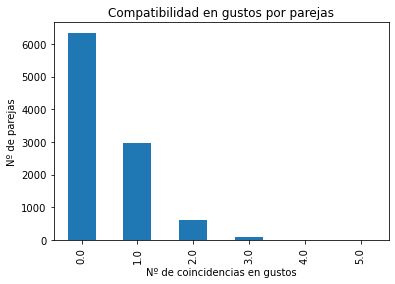

In [11]:
var1=df2.iloc[0:len(df2),3]+df2.iloc[0:len(df2),6]+df2.iloc[0:len(df2),9]+df2.iloc[0:len(df2),12]+df2.iloc[0:len(df2),15]+df2.iloc[0:len(df2),18]
#b= var.value_counts() 
plot = var1.value_counts().plot(kind='bar',
                                            title='Compatibilidad en gustos por parejas')
plt.ylabel('Nº de parejas')
plt.xlabel('Nº de coincidencias en gustos')
#plt.plot(b)

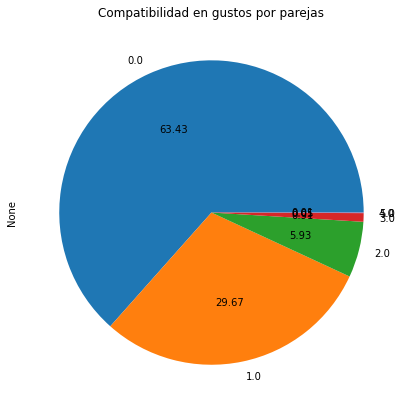

In [12]:
plot = var1.value_counts().plot(kind='pie',figsize=(7, 7),autopct='%.2f',
                                            title='Compatibilidad en gustos por parejas')

Text(0.5, 0, 'Nº de coincidencias en fotos')

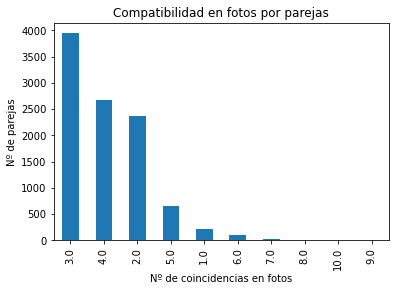

In [13]:
var2=df2.iloc[0:len(df2),21]+df2.iloc[0:len(df2),24]+df2.iloc[0:len(df2),27]+df2.iloc[0:len(df2),30]+df2.iloc[0:len(df2),33]+df2.iloc[0:len(df2),36]
#b= var.value_counts() 
plot = var2.value_counts().plot(kind='bar',
title='Compatibilidad en fotos por parejas')
plt.ylabel('Nº de parejas')
plt.xlabel('Nº de coincidencias en fotos')

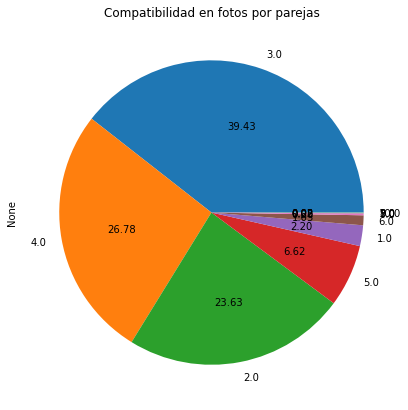

In [14]:
plot = var2.value_counts().plot(kind='pie',figsize=(7, 7),autopct='%.2f',
                                            title='Compatibilidad en fotos por parejas')

Text(0.5, 0, 'Nº de coincidencias')

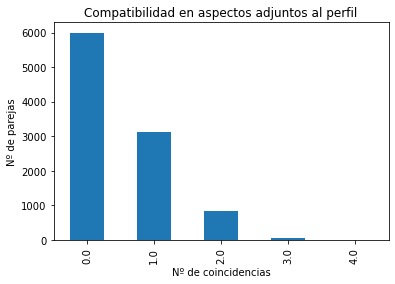

In [15]:
var3=df2.iloc[0:len(df2),39]+df2.iloc[0:len(df2),42]+df2.iloc[0:len(df2),45]+df2.iloc[0:len(df2),48]+df2.iloc[0:len(df2),51]
#b= var.value_counts() 
plot = var3.value_counts().plot(kind='bar',
title='Compatibilidad en aspectos adjuntos al perfil')
plt.ylabel('Nº de parejas')
plt.xlabel('Nº de coincidencias')

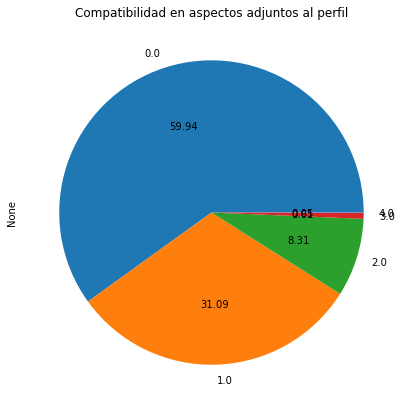

In [16]:
plot = var3.value_counts().plot(kind='pie',figsize=(7, 7),autopct='%.2f',
                                            title='Compatibilidad en aspectos adjuntos al perfil')

Text(0.5, 0, 'Edad relativa')

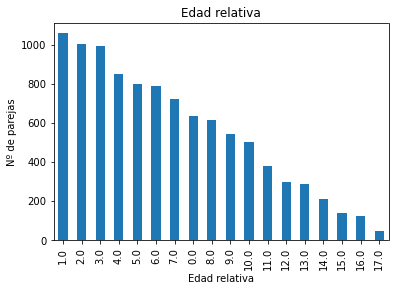

In [17]:
var4=df2.iloc[0:len(df2),54]
#b= var.value_counts() 
plot = var4.value_counts().plot(kind='bar',
title='Edad relativa')
plt.ylabel('Nº de parejas')
plt.xlabel('Edad relativa')

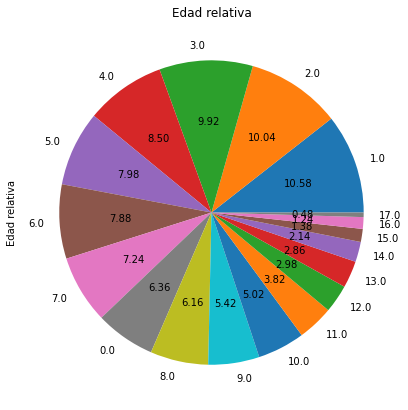

In [18]:
plot = var4.value_counts().plot(kind='pie',figsize=(7, 7),autopct='%.2f',
                                            title='Edad relativa')

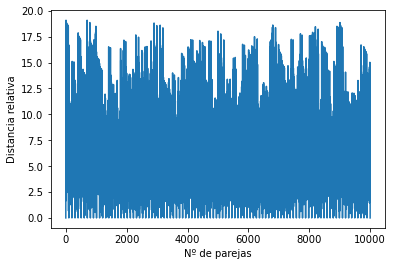

In [19]:

#Está mal hay que hacerla discreta
var5=df2.iloc[0:len(df2),56]
title='Distancia relativa'
plt.xlabel('Nº de parejas')
plt.ylabel('Distancia relativa')
plt.plot(var5)

In [20]:
likes_df = pd.read_csv('C:/Users/User/OneDrive/Escritorio/mis_sesgos.csv',encoding='utf-8')

In [21]:
likes_df.head()

ID_usuario  ID_perfil  Gusto del usuario por perro  \
0           0        0.0                          0.0   
1           0        1.0                          0.0   
2           0        2.0                          0.0   
3           0        3.0                          0.0   
4           0        4.0                          0.0   

   Gusto en común de perro  Gusto del perfil destino por perro  \
0                      0.0                                 0.0   
1                      0.0                                 0.0   
2                      0.0                                 0.0   
3                      0.0                                 1.0   
4                      0.0                                 1.0   

   Usuario no fumador  Coincidencia en no fumar  Perfil destino no fumador  \
0                 1.0                       1.0                        1.0   
1                 1.0                       1.0                        1.0   
2                 1.0                       0.0                        0.0   
3                 1.0                       0.0                        0.0   
4                 1.0                       0.0                        0.0   

   Interés del usuario en quedar en persona  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Interés común en quedar en persona  ...  Empleo adjunto ambos  \
0                                 0.0  ...                   0.0   
1                                 0.0  ...                   0.0   
2                                 0.0  ...                   0.0   
3                                 0.0  ...                   0.0   
4                                 0.0  ...                   0.0   

   Empleo adjunto perfil destino  Comentario personal adjunto usuario  \
0                            0.0                                  1.0   
1                            0.0                                  1.0   
2                            0.0                                  1.0   
3                            0.0                                  1.0   
4                            0.0                                  1.0   

   Comentario personal adjunto ambos  \
0                                1.0   
1                                1.0   
2                                0.0   
3                                1.0   
4                                1.0   

   Comentario personal adjunto perfil destino  Edad usuario  Edad relativa  \
0                                         1.0          24.0            0.0   
1                                         1.0          24.0            7.0   
2                                         0.0          24.0            4.0   
3                                         1.0          24.0            2.0   
4                                         1.0          24.0            3.0   

   Edad perfil destino  Distancia relativa      prob  
0                 24.0            0.000000  1.000000  
1                 31.0            6.008397  0.518155  
2                 20.0           13.230567  0.133445  
3                 22.0           12.122429  0.150664  
4                 27.0            6.654838  0.473514  

[5 rows x 58 columns]

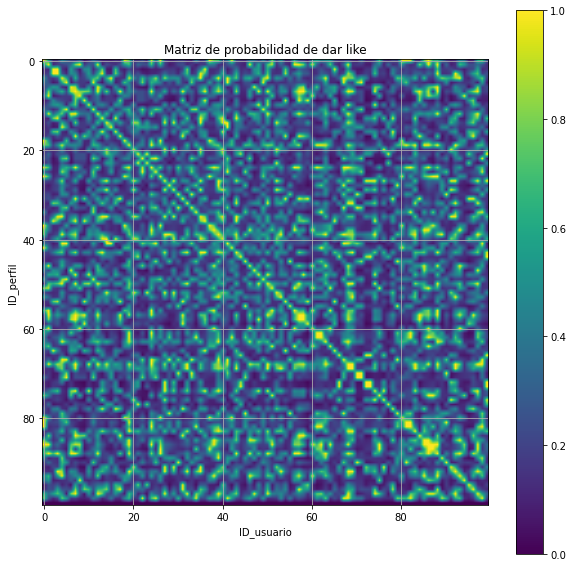

In [22]:
matrix_proba=np.zeros([n_usuarios,n_usuarios])
prob=likes_df['prob'].tolist()
#
id_usuario=likes_df['ID_usuario'].tolist()
id_perfil=likes_df['ID_perfil'].tolist()
likes_df =likes_df.drop(likes_df[likes_df['ID_usuario']==likes_df['ID_perfil']].index)
for i in range(0,len(likes_df)):
  a=id_usuario[i]
  b=id_perfil[i]
  matrix_proba[int(a),int(b)]= prob[i]

pyplot.figure(figsize=(10,10))
plt.imshow(matrix_proba,  
           interpolation ='bilinear', 
           alpha = 1)
plt.title("Matriz de probabilidad de dar like")
plt.xlabel('ID_usuario')
plt.ylabel('ID_perfil')
plt.grid()
plt.colorbar()
plt.show()



In [23]:
likes=np.zeros(len(likes_df))
prob=np.asarray(likes_df[['prob']])
for i in range(0,len(prob)):
 if prob[i]>0.5:
   likes[i]=1
 else:
   likes[i]=0
lista_likes=likes.ravel().tolist()

In [24]:
df2=likes_df
df2.loc[:,'Likes/No likes'] = lista_likes
df2.head()

ID_usuario  ID_perfil  Gusto del usuario por perro  \
1           0        1.0                          0.0   
2           0        2.0                          0.0   
3           0        3.0                          0.0   
4           0        4.0                          0.0   
5           0        5.0                          0.0   

   Gusto en común de perro  Gusto del perfil destino por perro  \
1                      0.0                                 0.0   
2                      0.0                                 0.0   
3                      0.0                                 1.0   
4                      0.0                                 1.0   
5                      0.0                                 0.0   

   Usuario no fumador  Coincidencia en no fumar  Perfil destino no fumador  \
1                 1.0                       1.0                        1.0   
2                 1.0                       0.0                        0.0   
3                 1.0                       0.0                        0.0   
4                 1.0                       0.0                        0.0   
5                 1.0                       0.0                        0.0   

   Interés del usuario en quedar en persona  \
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
5                                       0.0   

   Interés común en quedar en persona  ...  Empleo adjunto perfil destino  \
1                                 0.0  ...                            0.0   
2                                 0.0  ...                            0.0   
3                                 0.0  ...                            0.0   
4                                 0.0  ...                            0.0   
5                                 0.0  ...                            1.0   

   Comentario personal adjunto usuario  Comentario personal adjunto ambos  \
1                                  1.0                                1.0   
2                                  1.0                                0.0   
3                                  1.0                                1.0   
4                                  1.0                                1.0   
5                                  1.0                                0.0   

   Comentario personal adjunto perfil destino  Edad usuario  Edad relativa  \
1                                         1.0          24.0            7.0   
2                                         0.0          24.0            4.0   
3                                         1.0          24.0            2.0   
4                                         1.0          24.0            3.0   
5                                         0.0          24.0            8.0   

   Edad perfil destino  Distancia relativa      prob  Likes/No likes  
1                 31.0            6.008397  0.518155             1.0  
2                 20.0           13.230567  0.133445             0.0  
3                 22.0           12.122429  0.150664             0.0  
4                 27.0            6.654838  0.473514             0.0  
5                 32.0            5.398323  0.330025             0.0  

[5 rows x 59 columns]

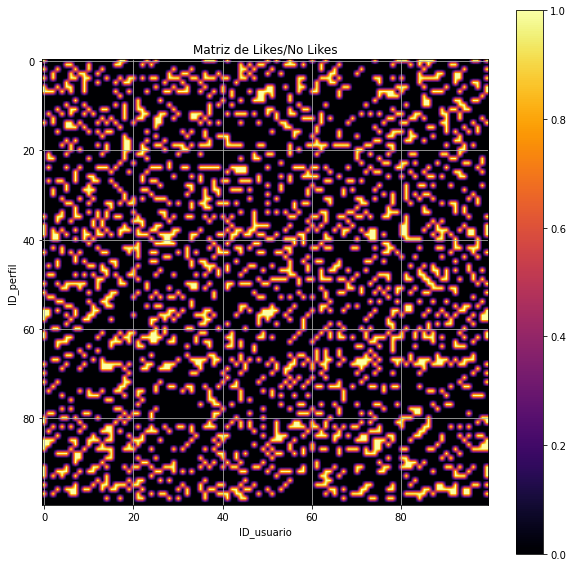

In [25]:
matrix_likes=np.zeros([n_usuarios,n_usuarios])
for i in range(0,len(likes_df)):
  a=id_usuario[i]
  b=id_perfil[i]
  matrix_likes[int(a),int(b)]= lista_likes[i]

pyplot.figure(figsize=(10,10))
plt.imshow(matrix_likes, cmap='inferno',
           interpolation ='bilinear', 
           alpha = 1)
plt.title("Matriz de Likes/No Likes")
plt.xlabel('ID_usuario')
plt.ylabel('ID_perfil')
plt.grid()
plt.colorbar()
plt.show()

In [26]:
X = np.asarray(df2[['Gusto del usuario por perro','Gusto en común de perro','Gusto del perfil destino por perro','Usuario no fumador','Coincidencia en no fumar','Perfil destino no fumador','Interés del usuario en quedar en persona','Interés común en quedar en persona','Interés del perfil destino en quedar en persona','Gusto del usuario por el gimnasio','Gusto en común por el gimnasio','Gusto del perfil destino por el gimnasio','Gusto del usuario por viajar','Gusto en común por viajar','Gusto del perfil destino por viajar','Usuario socialmente activo','Coincidencia en ser socialmente activo','Perfil destino socialmente activo','Nº de fotos selfie usuario','Nº de fotos coincidentes selfie','Nº de fotos selfie perfil destino','Nº de fotos casuales usuario','Nº de fotos coincidentes casuales','Nº de fotos casuales perfil destino','Nº de fotos playa usuario','Nº de fotos coincidentes playa','Nº de fotos playa perfil destino','Nº de fotos lugares turísticos usuario','Nº de fotos coincidentes lugares turísticos','Nº de fotos lugares turísticos perfil destino','Nº de fotos gimnasio usuario','Nº de fotos coincidentes gimnasio','Nº de fotos gimnasio perfil destino','Nº de fotos mascota usuario','Nº de fotos coincidentes mascota','Nº de fotos mascota perfil destino','Instagram adjunto usuario','Instagram adjunto ambos','Instagram adjunto perfil destino','Spotify adjunto usuario','Spotify adjunto ambos','Spotify adjunto perfil destino','Universidad adjunta usuario','Universidad adjunta ambos','Universidad adjunta perfil destino','Empleo adjunto usuario','Empleo adjunto ambos','Empleo adjunto perfil destino','Comentario personal adjunto usuario','Comentario personal adjunto ambos','Comentario personal adjunto perfil destino','Edad usuario','Edad relativa','Edad perfil destino','Distancia relativa']])

y = np.asarray(df2['Likes/No likes'])

In [27]:
n_usuarios_extra=50
n_usuarios_final=n_usuarios+n_usuarios_extra
lista=np.array(df2['Likes/No likes'])
id1_aux=np.array(df2['ID_usuario'])
id2_aux=np.array(df2['ID_perfil'])
matriz_likes_dados=np.zeros([n_usuarios_final,n_usuarios_final])
matriz_match_finales=np.zeros([n_usuarios_final,n_usuarios_final])
for i in range (0,n_usuarios_final):
     for j in range (0,n_usuarios_final):
         matriz_likes_dados[i,j]=2
for i in range (0,len(X)):
         a=int(id1_aux[i])
         b=int(id2_aux[i])
         if lista[i]==1:
          matriz_likes_dados[a,b]=1
         elif lista[i]==0:
          matriz_likes_dados[a,b]=0
for id in range(0,len(X)):
  if lista[id]==1:
         a=id1_aux[id]
         b=id2_aux[id]
         
         for id9 in range(0,len(X)):
            if id2_aux[id9]==a and id1_aux[id9]==b and lista[id9]==1:
                 matriz_match_finales[int(a),int(b)]=1
                 matriz_match_finales[int(b),int(a)]=1


In [28]:
likes_recibidos=np.zeros([100])
likes_enviados=np.zeros([100])
for i in range(0,n_usuarios):
 likes_enviados[i]=sum(matriz_likes_dados[i,0:n_usuarios])
 likes_recibidos[i]=sum(matriz_likes_dados[0:n_usuarios,i])

lista_likes_recibidos=likes_enviados.ravel().tolist()
caracteristicas_df.loc[:,'Likes recibidos'] = lista_likes_recibidos
caracteristicas_df.to_csv('C:/Users/User/OneDrive/Escritorio/viejo.csv',index=False)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(X, df2['Likes/No likes'], test_size=0.2, random_state=69)

In [30]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [31]:
predicted = model.predict(X_test)
predicted2=model.predict(X)

print(np.mean(predicted == y_test))

0.8949494949494949


[[1421   95]
 [ 113  351]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

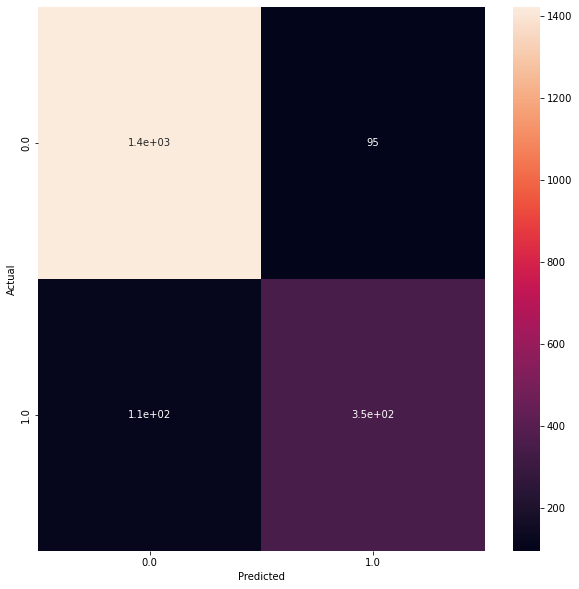

In [32]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))
import seaborn as sn
data = {'y_Actual':    y_test,
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.rcParams["figure.figsize"] = (10, 10)
sn.heatmap(confusion_matrix, annot=True)

In [33]:
ypredicted = model.predict(X_test)
yactual=y_test

from sklearn.metrics import classification_report
report=classification_report(yactual,ypredicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      1516
         1.0       0.79      0.76      0.77       464

    accuracy                           0.89      1980
   macro avg       0.86      0.85      0.85      1980
weighted avg       0.89      0.89      0.89      1980



In [34]:
from sklearn.metrics import mean_squared_error
 


rmse = mean_squared_error(
       y_true = y_test,
        y_pred   = predicted,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.32411495653626515


In [35]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicted,
            normalize = True
           )
print(f"El accuracy total es: {100 * accuracy} %")

El accuracy total es: 89.4949494949495 %


In [36]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
recall_naives_0=recall_score(y_test, predicted, average=None)[0]
recall_naives_1=recall_score(y_test, predicted, average=None)[1]
f1_score_naives_0=f1_score(y_test, predicted, average=None)[0]
f1_score_naives_1=f1_score(y_test, predicted, average=None)[1]

precision_score_naives_0=precision_score(y_test, predicted, average=None)[0]
precision_score_naives_1=precision_score(y_test, predicted, average=None)[1]

In [37]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, df2["Likes/No likes"], test_size=0.2, random_state=142)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
prediction_results = knn.predict(X_test)
print(prediction_results)
predicted2=knn.predict(X)

[1. 0. 0. ... 1. 0. 0.]


[[1476   25]
 [ 197  282]]


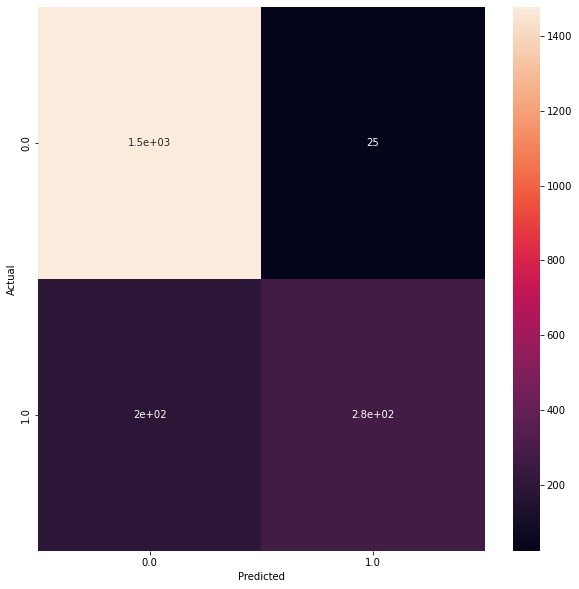

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_results))
import seaborn as sn
data = {'y_Actual':   y_test,
        'y_Predicted': prediction_results
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

In [39]:
from sklearn.metrics import classification_report
report=classification_report(y_test,prediction_results)
print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      1501
         1.0       0.92      0.59      0.72       479

    accuracy                           0.89      1980
   macro avg       0.90      0.79      0.82      1980
weighted avg       0.89      0.89      0.88      1980



In [40]:

precision_recall_fscore_support(y_test, prediction_results, average='macro')


(0.9004071174488085, 0.7860354753059546, 0.823806981341722, None)

In [41]:
recall_knn_0=recall_score(y_test, prediction_results, average=None)[0]
recall_knn_1=recall_score(y_test, prediction_results, average=None)[1]
f1_score_knn_0=f1_score(y_test, prediction_results, average=None)[0]
f1_score_knn_1=f1_score(y_test, prediction_results, average=None)[1]
precision_score_knn_0=precision_score(y_test, prediction_results, average=None)[0]
precision_score_knn_1=precision_score(y_test, prediction_results, average=None)[1]

In [42]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = prediction_results,
            normalize = True
           )
print(f"El accuracy total es: {100 * accuracy} %")

El accuracy total es: 88.7878787878788 %


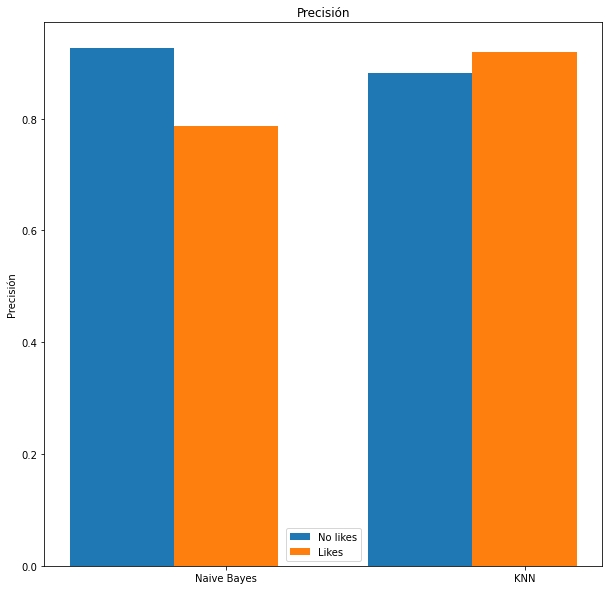

In [43]:
import numpy as np
import matplotlib.pyplot as plt
 
serie_1 = [precision_score_naives_0, precision_score_knn_0]
serie_2 = [precision_score_naives_1, precision_score_knn_1]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='No likes')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Likes')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Naive Bayes', 'KNN'))
 
plt.ylabel('Precisión')

plt.title('Precisión')
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()


import pandas as pd
df=pd.Dataframe

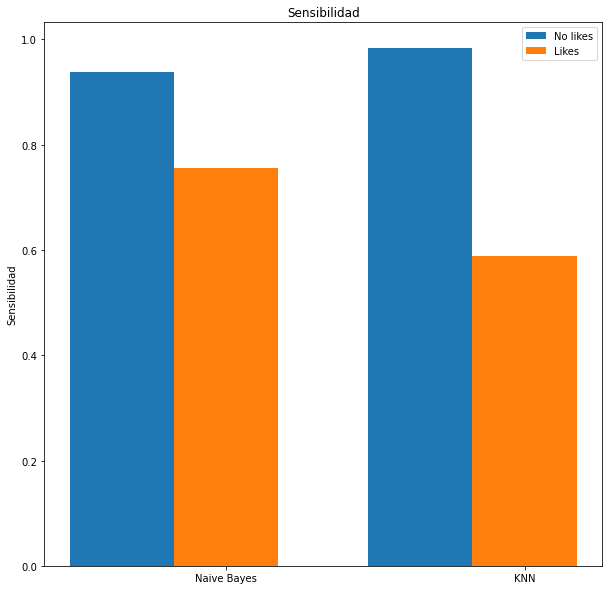

In [44]:
import numpy as np
import matplotlib.pyplot as plt
 
serie_1 = [recall_naives_0, recall_knn_0]
serie_2 = [recall_naives_1, recall_knn_1]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='No likes')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Likes')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Naive Bayes', 'KNN'))
 
plt.ylabel('Sensibilidad')
plt.rcParams["figure.figsize"] = (10, 10)
plt.title('Sensibilidad')
 
plt.show()

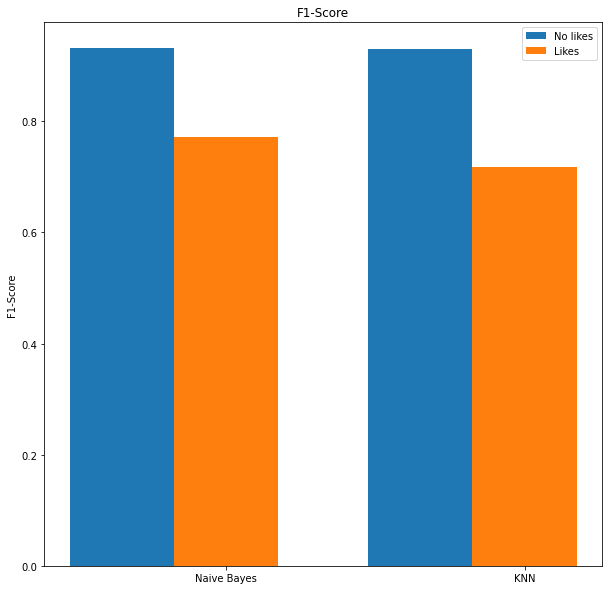

In [45]:
import numpy as np
import matplotlib.pyplot as plt
 
serie_1 = [f1_score_naives_0, f1_score_knn_0]
serie_2 = [f1_score_naives_1, f1_score_knn_1]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='No likes')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Likes')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Naive Bayes', 'KNN'))
 
plt.ylabel('F1-Score')
plt.rcParams["figure.figsize"] = (10, 10)
plt.title('F1-Score')
 
plt.show()

In [46]:
import timeit



from sklearn import preprocessing
X3 = preprocessing.StandardScaler().fit(X).transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, df2['Likes/No likes'], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7920, 55) (7920,)
Test set: (1980, 55) (1980,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
start_time = timeit.default_timer()
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print("The time difference is :", timeit.default_timer() - start_time)
LR
print(LR.score(X_test,y_test))

The time difference is : 0.1636725000000041
0.9121212121212121


In [49]:
ypredicted = LR.predict(X_test)
yactual=y_test

from sklearn.metrics import classification_report
report=classification_report(yactual,ypredicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      1521
         1.0       0.84      0.77      0.80       459

    accuracy                           0.91      1980
   macro avg       0.88      0.86      0.87      1980
weighted avg       0.91      0.91      0.91      1980



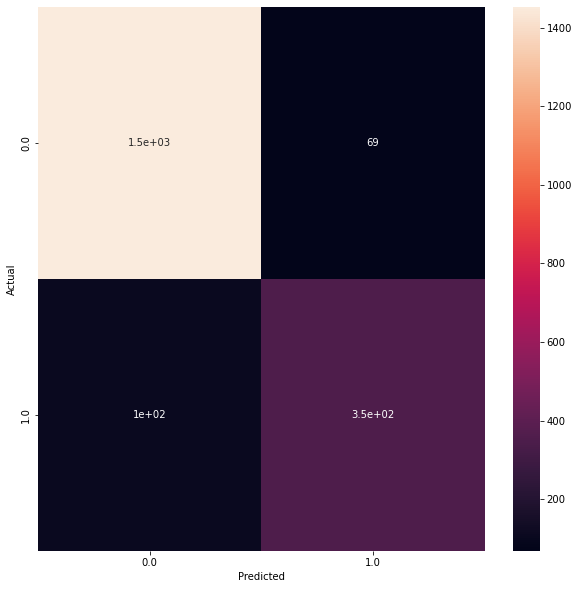

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    yactual,
        'y_Predicted': ypredicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [51]:
f1_score_LR_0=f1_score(y_test, ypredicted, average=None)[0]
f1_score_LR_1=f1_score(y_test, ypredicted, average=None)[1]

In [52]:

df1=df2.drop(columns='prob')
df1=df1.drop(columns='ID_usuario')
df1=df1.drop(columns='ID_perfil')



In [53]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=16, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=5, random_state=42)

In [54]:
y_predict = clf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.996969696969697

In [55]:
fig, ax = plt.subplots(figsize=(500, 200))
from sklearn.tree import plot_tree
print(f"Profundidad del árbol: {clf_model.get_depth()}")
print(f"Número de nodos terminales: {clf_model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf_model,
            feature_names = df1.drop(columns='Likes/No likes').columns,
            class_names   = 'Likes/No likes',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 100,
            ax            = ax
       )

import urllib

plt.savefig("Plot generated using Matplotlib.png")

Profundidad del árbol: 15
Número de nodos terminales: 42


In [56]:
from sklearn.tree import export_text
texto_modelo = export_text(
                    decision_tree = clf_model,
                    feature_names = list(df1.drop(columns = "Likes/No likes").columns)
               )
print(texto_modelo)

|--- Distancia relativa <= -0.23
|   |--- Edad relativa <= -0.81
|   |   |--- class: 1.0
|   |--- Edad relativa >  -0.81
|   |   |--- Distancia relativa <= -1.56
|   |   |   |--- Edad relativa <= 1.59
|   |   |   |   |--- class: 1.0
|   |   |   |--- Edad relativa >  1.59
|   |   |   |   |--- Gusto en común de perro <= 0.82
|   |   |   |   |   |--- Edad relativa <= 2.07
|   |   |   |   |   |   |--- Distancia relativa <= -1.82
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Distancia relativa >  -1.82
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Edad relativa >  2.07
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Gusto en común de perro >  0.82
|   |   |   |   |   |--- class: 1.0
|   |   |--- Distancia relativa >  -1.56
|   |   |   |--- Edad relativa <= 0.39
|   |   |   |   |--- Gusto en común de perro <= 0.82
|   |   |   |   |   |--- Gusto en común por viajar <= 1.60
|   |   |   |   |   |   |--- Coincidencia en no fumar <= 1

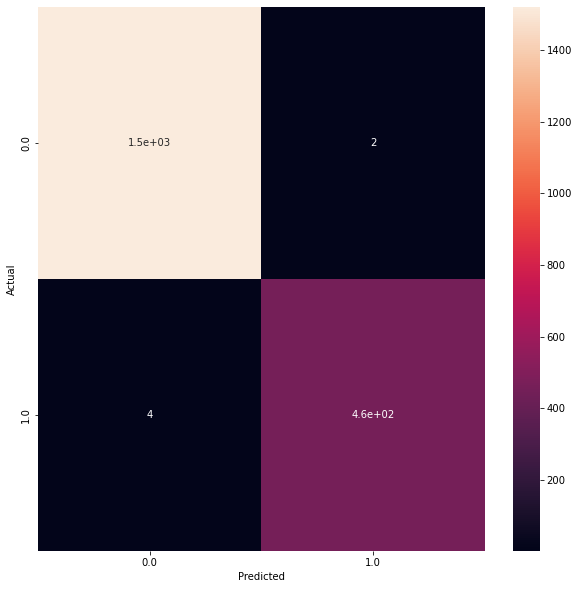

In [59]:
ypredicted = clf_model.predict(X=X_test)


import seaborn as sn
data = {'y_Actual':  list(y_test),
        'y_Predicted': list(y_predict)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [60]:
ypredicted = clf_model.predict(X_test)
yactual=y_test

from sklearn.metrics import classification_report
report=classification_report(yactual,ypredicted)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1521
         1.0       1.00      0.99      0.99       459

    accuracy                           1.00      1980
   macro avg       1.00      0.99      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [61]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df1.drop(columns = "Likes/No likes").columns,
                             'importancia': clf_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
54                               Distancia relativa     0.494201
52                                    Edad relativa     0.263723
1                           Gusto en común de perro     0.061546
4                          Coincidencia en no fumar     0.044232
13                        Gusto en común por viajar     0.041090
46                             Empleo adjunto ambos     0.034674
7                Interés común en quedar en persona     0.024458
16           Coincidencia en ser socialmente activo     0.013324
51                                     Edad usuario     0.009671
53                              Edad perfil destino     0.006243
10                   Gusto en común por el gimnasio     0.005624
44               Universidad adjunta perfil destino     0.000445
17                Perfil destino socialmente activo     0.000370
6          Interés del usuario en quedar en persona     0.000257
43                        Universidad adjunta ambos     0.000089
15                       Usuario socialmente activo     0.000050
40                            Spotify adjunto ambos     0.000000
34                 Nº de fotos coincidentes mascota     0.000000
35               Nº de fotos mascota perfil destino     0.000000
36                        Instagram adjunto usuario     0.000000
37                          Instagram adjunto ambos     0.000000
38                 Instagram adjunto perfil destino     0.000000
39                          Spotify adjunto usuario     0.000000
50       Comentario personal adjunto perfil destino     0.000000
41                   Spotify adjunto perfil destino     0.000000
42                      Universidad adjunta usuario     0.000000
49                Comentario personal adjunto ambos     0.000000
45                           Empleo adjunto usuario     0.000000
32              Nº de fotos gimnasio perfil destino     0.000000
47                    Empleo adjunto perfil destino     0.000000
48              Comentario personal adjunto usuario     0.000000
33                      Nº de fotos mascota usuario     0.000000
0                       Gusto del usuario por perro     0.000000
31                Nº de fotos coincidentes gimnasio     0.000000
30                     Nº de fotos gimnasio usuario     0.000000
2                Gusto del perfil destino por perro     0.000000
3                                Usuario no fumador     0.000000
5                         Perfil destino no fumador     0.000000
8   Interés del perfil destino en quedar en persona     0.000000
9                 Gusto del usuario por el gimnasio     0.000000
11         Gusto del perfil destino por el gimnasio     0.000000
12                     Gusto del usuario por viajar     0.000000
14              Gusto del perfil destino por viajar     0.000000
18                       Nº de fotos selfie usuario     0.000000
19                  Nº de fotos coincidentes selfie     0.000000
20                Nº de fotos selfie perfil destino     0.000000
21                     Nº de fotos casuales usuario     0.000000
22                Nº de fotos coincidentes casuales     0.000000
23              Nº de fotos casuales perfil destino     0.000000
24                        Nº de fotos playa usuario     0.000000
25                   Nº de fotos coincidentes playa     0.000000
26                 Nº de fotos playa perfil destino     0.000000
28      Nº de fotos coincidentes lugares turísticos     0.000000
29    Nº de fotos lugares turísticos perfil destino     0.000000
27           Nº de fotos lugares turísticos usuario     0.000000

In [62]:
f1_score_arbol_0=f1_score(y_test, ypredicted, average=None)[0]
f1_score_arbol_1=f1_score(y_test, ypredicted, average=None)[1]

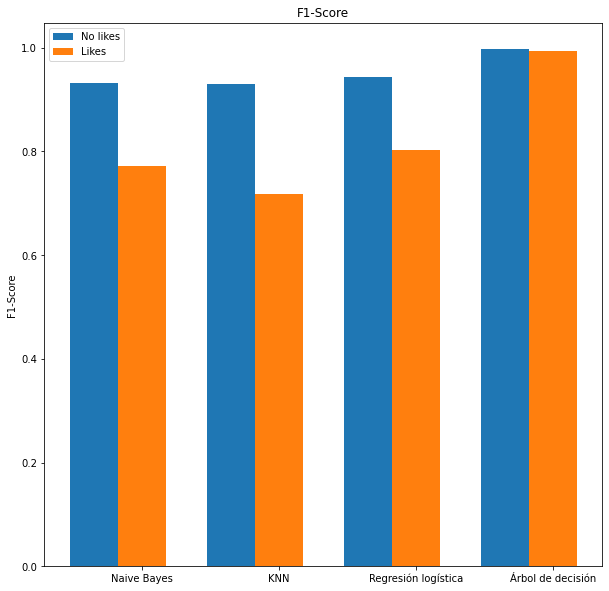

In [63]:
import numpy as np
import matplotlib.pyplot as plt
 
serie_1 = [f1_score_naives_0, f1_score_knn_0,f1_score_LR_0,f1_score_arbol_0]
serie_2 = [f1_score_naives_1, f1_score_knn_1,f1_score_LR_1,f1_score_arbol_1]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='No likes')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Likes')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Naive Bayes', 'KNN','Regresión logística','Árbol de decisión'))
 
plt.ylabel('F1-Score')
plt.rcParams["figure.figsize"] = (10, 10)
plt.title('F1-Score')
 
plt.show()